## ratio reduction

In [1]:
import numpy as np
import json
from collections import OrderedDict
from pprint import pprint

def reduce_ratio(image_id):
    annotation_file = "/home/taeho/data/coco2014/annotations/annotations/instances_val2014.json"
        
    with open(annotation_file, encoding="utf-8") as data_file:
        data = json.load(data_file, object_pairs_hook=OrderedDict)

    boxes = []
    labels = []
    is_difficult = []
    image_number = int(image_id[-6:])
    
    height = 300
    width = 300
    
    for index, name in enumerate(data["images"]):
        if name["id"] == image_number:
            image_height = name["height"]
            image_width = name["width"]
    
    height_ratio = height / image_height
    width_ratio = width / image_width
    
    for index, name in enumerate(data["annotations"]):
        category_id = name["category_id"]
        bbox = name["bbox"]

        if name["image_id"] == image_number:
            for index, name in enumerate(data["categories"]):
                    
                if name["id"] == category_id:
                    
                    xmin = bbox[0]
                    ymin = bbox[1]
                    xmax = bbox[0] + bbox[2]
                    ymax = bbox[1] + bbox[3]
                    
                    bbox = [xmin, ymin, xmax, ymax]
                    #print(bbox)
                    xmin = round(xmin * width_ratio)
                    ymin = round(ymin * height_ratio)
                    xmax = round(xmax * width_ratio)
                    ymax = round(ymax * height_ratio)
                    
                    bbox = [xmin, ymin, xmax, ymax]
                    #print(bbox)
                    boxes.append(bbox)

    return (np.array(boxes, dtype=np.int64))

#reduce_ratio("COCO_val2014_000000391895")

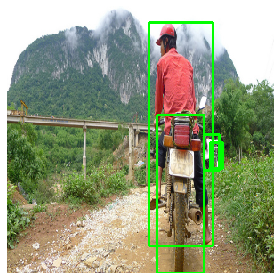

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

boxes = reduce_ratio("COCO_val2014_000000391895")
image = "/home/taeho/data/coco2014/images/val2014/COCO_val2014_000000391895.jpg"

#pprint(boxes)
orig_image = cv2.imread(image)
image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (300, 300))

for i, num in enumerate(boxes):
    cv2.rectangle(image, (num[0], num[1]), (num[2], num[3]), (0, 255, 0), 2)
    
plt.figure()
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.imshow(image)
plt.show()